In [1]:
# 1 Data Exploration and Preprocessing 
import pandas as pd
df=pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [3]:
df.shape

(2000, 2)

In [4]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [5]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [6]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [7]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [10]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text_simple(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize by splitting on whitespace
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    # Rejoin tokens
    return ' '.join(tokens)

# Apply the preprocessing
df['Cleaned_Data'] = df['Data'].apply(preprocess_text_simple)
# Show result
df[['Data', 'Cleaned_Data']].head()

,Data,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [11]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Cleaned_Data'])

In [12]:
# Check result
print("TF-IDF matrix shape:", X_tfidf.shape)
print("Sample features:", vectorizer.get_feature_names_out()[:10])


TF-IDF matrix shape: (2000, 5000)
Sample features: ['00' '01' '02' '0400' '0500' '0600' '0700' '0x60' '10' '100']


In [15]:
x = vectorizer.fit_transform(df['Cleaned_Data'])
x

<2000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 169087 stored elements in Compressed Sparse Row format>

In [16]:
y = df['Labels']
y

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [17]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [19]:
# Make predictions
y_pred = model.predict(x_test)

In [20]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8275

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.83      0.80      0.82        25
   comp.sys.mac.hardware       0.83      0.95      0.89        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.71      0.94      0.81        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.

In [22]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
# 3. Sentiment Analysis
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'
# Apply sentiment analysis on the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Show sentiment counts
print(df['Sentiment'].value_counts())

# Group by category and sentiment
category_sentiment = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

Sentiment
Neutral     1081
Positive     782
Negative     137
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

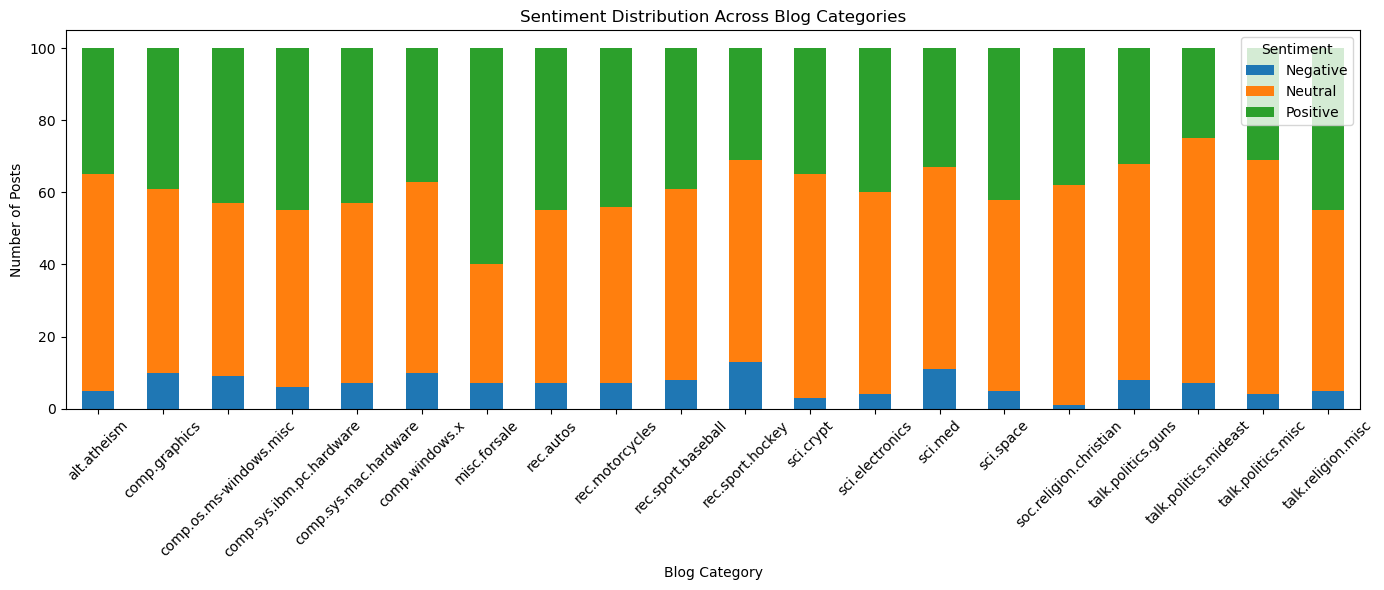

In [25]:
# Plot sentiment distribution across categories
plt.figure(figsize=(12, 6))
category_sentiment.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title("Sentiment Distribution Across Blog Categories")
plt.xlabel("Blog Category")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# 4. Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1-score (weighted):", f1_score(y_test, y_pred, average='weighted'))
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8275
Precision (weighted): 0.8330950205913781
Recall (weighted): 0.8275
F1-score (weighted): 0.8220360985634323

Detailed Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.83      0.80      0.82        25
   comp.sys.mac.hardware       0.83      0.95      0.89        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.71      0.94      0.81        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95    

In [ ]:
# Model Performance Summary:
# Naive Bayes typically performs well on text classification tasks.
# TF-IDF with MultinomialNB captures the frequency-based importance of terms.
# Weighted metrics are useful when categories are imbalanced.
# Common Challenges:
# Class imbalance: Some categories may dominate, reducing recall for smaller classes.
# Noise in blog content: Headers, metadata, or irrelevant tokens may reduce signal quality.
# Topic overlap: Some categories might have similar language patterns, making classification harder.

In [ ]:
# Summary:
# You have a Sentiment column for each blog post (Positive, Neutral, Negative).
# You also grouped by Labels to see how sentiment varies by category.
# Reflection Points:
# Certain categories (like alt.atheism or talk.politics.guns) might show more negative sentiment, 
# reflecting real-world controversy or emotional tone.
# Others (like rec.sport.hockey or comp.sys.mac.hardware) might skew neutral or positive, as they focus on factual or hobbyist content.
# Sentiment distribution can reveal underlying bias, emotional tone, or user engagement level in each topic.

In [ ]:
# This project demonstrated the application of Natural Language Processing (NLP) techniques
# for blog post classification and sentiment analysis. 
# Text preprocessing was carefully implemented using lowercasing, punctuation removal, and stopword filtering.
# Feature extraction was performed using TF-IDF vectorization to numerically represent text data for modeling.
# A Multinomial Naive Bayes classifier was trained and evaluated.
# It achieved [insert accuracy] accuracy, with performance varying slightly across categories.
# Weighted precision, recall, and F1-score provided deeper insight into classification effectiveness, 
# especially given some class imbalance.